# 概要
ここでは、線形回帰モデルの実装テストです。以下のサイトを参考にしました。
https://qiita.com/fujin/items/7f0a7b6fc8fb662f510d

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


今回は、ボストン住宅価格データを利用して、トレーニング・予測・評価を行います。
特徴量は「部屋数」のみを使用します（単回帰）

In [4]:
########################
# 線形回帰（最小二乗法）
########################
from sklearn.linear_model import LinearRegression
from sklearn import datasets

# データセットロード
boston = datasets.load_boston()

# 特徴量
X = boston.data[:, [5]] # 部屋数

# 目的変数
Y = boston.target

# トレーニング・テストデータ分割
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0)

# LinearRegression
lr = LinearRegression()
lr.fit(X_train, Y_train)

# 予測　
Y_pred = lr.predict(X_test)

#
# 評価
#
# 平均絶対誤差(MAE)
mae = mean_absolute_error(Y_test, Y_pred)
# 平方根平均二乗誤差（RMSE）
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))  
# スコア
score = lr.score(X_test, Y_test)

print("MAE = %.2f,  RMSE = %.2f,  score = %.2f" % (mae, rmse, score))
print("Coef = ", lr.coef_)
print("Intercept =", lr.intercept_)

MAE = 4.21,  RMSE = 6.59,  score = 0.47
Coef =  [9.31294923]
Intercept = -36.180992646339185


coef_ は「重み」、intercept_ は「バイアス」のことです

## プロット

テストデータ上での正解値（青）と予測値（赤）をプロットします。
部屋数の増加に伴い、予測値が上昇している事がわかります。

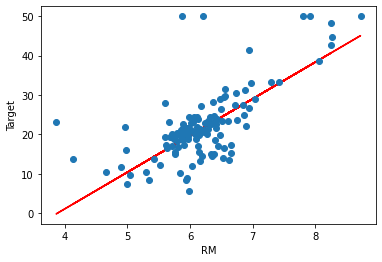

In [7]:
plt.xlabel("RM")
plt.ylabel("Target")
plt.plot(X_test, Y_pred, "r-")
plt.plot(X_test, Y_test, "o")

## 特徴量を増やす

特徴量の部分を修正し、トレーニング・予測・評価を行う
特徴量が13個の、重回帰になります

In [15]:
########################
# 線形回帰（最小二乗法）
########################
from sklearn.linear_model import LinearRegression
from sklearn import datasets

# データセットロード
boston = datasets.load_boston()

# ※※※※変更箇所※※※※特徴量※※※※
X = boston.data # 全ての特徴量を選択。

# 目的変数
Y = boston.target

# トレーニング・テストデータ分割
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0)

# LinearRegression
lr = LinearRegression()
lr.fit(X_train, Y_train)

# 予測　
Y_pred = lr.predict(X_test)

#
# 評価
#
# 平均絶対誤差(MAE)
mae = mean_absolute_error(Y_test, Y_pred)
# 平方根平均二乗誤差（RMSE）
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))  
# スコア
score = lr.score(X_test, Y_test)

print("MAE = %.2f,  RMSE = %.2f,  score = %.2f" % (mae, rmse, score))
print("Coef = ", lr.coef_)
print("Intercept =", lr.intercept_)

MAE = 3.67,  RMSE = 5.46,  score = 0.64
Coef =  [-1.17735289e-01  4.40174969e-02 -5.76814314e-03  2.39341594e+00
 -1.55894211e+01  3.76896770e+00 -7.03517828e-03 -1.43495641e+00
  2.40081086e-01 -1.12972810e-02 -9.85546732e-01  8.44443453e-03
 -4.99116797e-01]
Intercept = 36.933255457118975


上記の結果は、13個の重みが出力されました。予測精度が少しですが向上することを確認できました。

## リッジ回帰

ペナルティとして正則化項(二乗和)を損失関数に付与するのがL2正則化(リッジ回帰)です。

この実装テストでは、
sklearn.linear_model.Ridgeクラスを使用します。

トレーニング・予測・評価手法
ボストン住宅価格データを利用して、トレーニング・予測・評価を行います。
（特徴量は１つ、部屋数のみを使用します）

又、alpha値が正則化項の λ にあたるハイパーパラメータとなり、
値を大きくすることでペナルティが強くなります。
以下は、alpha値を 0.1〜100 まで増加させた場合の重みとスコアの変化を確認するコードになります。

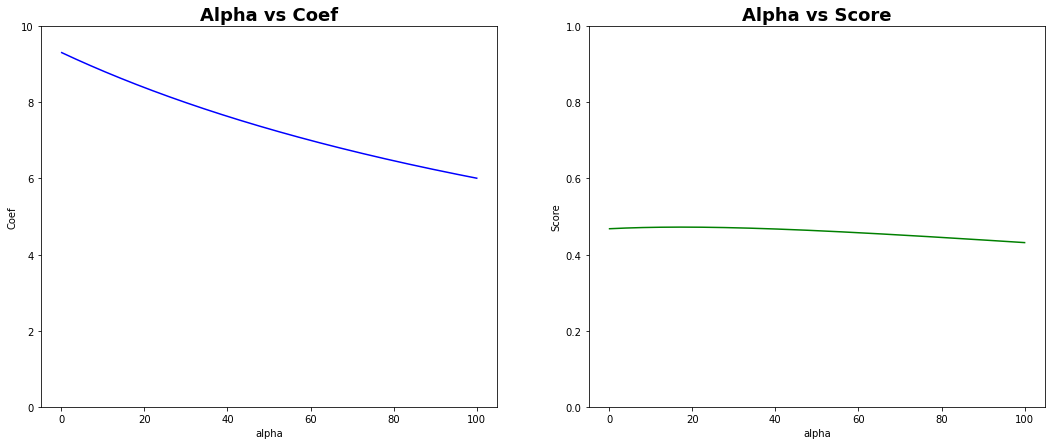

In [17]:
########################
#  リッジ回帰
########################
from sklearn.linear_model import Ridge
from sklearn import datasets

boston = datasets.load_boston()

# 特徴量
X = boston.data[:, [5]] # 部屋数

# 目的変数
Y = boston.target

# トレーニング・テストデータ分割
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0)

list_alpha = [n*0.1 for n in range(1, 1001)]
list_coef = []
list_score = []
for alpha_val in list_alpha:
    # Ridge
    ridge = Ridge(alpha=alpha_val)
    ridge.fit(X_train, Y_train)

    # 予測　
    Y_pred = ridge.predict(X_test)

    # スコア
    score = ridge.score(X_test, Y_test)

    list_coef.append(ridge.coef_)
    list_score.append(score)

plt.figure(figsize=(18, 7))

plt.subplot(1, 2, 1)
plt.title("Alpha vs Coef", fontweight="bold", size=18)
plt.xlabel("alpha")
plt.ylabel("Coef")
plt.ylim(0, 10)
plt.plot(list_alpha, list_coef, "-b")

plt.subplot(1, 2, 2)
plt.title("Alpha vs Score", fontweight="bold", size=18)
plt.xlabel("alpha")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.plot(list_alpha, list_score, "-g")
plt.show()

プロットを見てみると alpha値の増加により重みが小さくなる事が確認出来ます。
スコアは、少し上がった後下がっています。
重みが小さくなり、若干アンダーフィッティングが発生しているようです。

## トレーニングデータの増減によるリッジ回帰と通常の線形回帰の比較

トレーニングデータを 50〜500件まで変化させ、そのスコアをプロットしてみます。
データセットは、sklearn.datasets.make_regressionクラスを使って生成しました。
※特徴量の数（n_features）を 100、相関関係のある特徴量の数（n_informative）を 5 に設定しています。

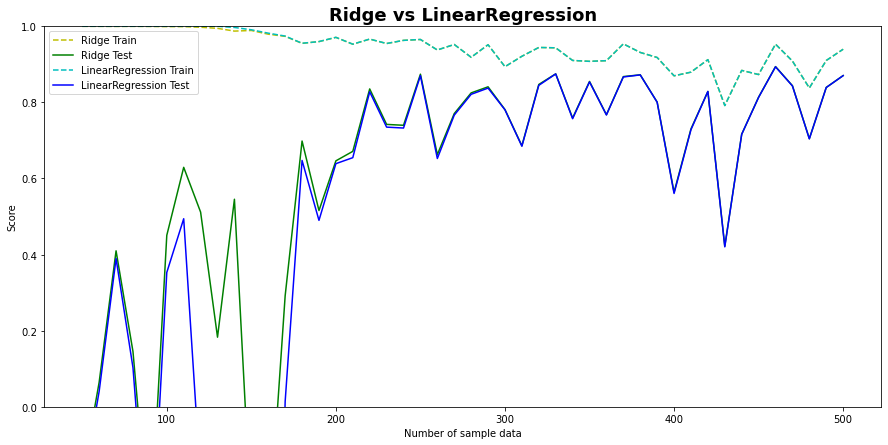

In [18]:
from sklearn.datasets import make_regression

ridge_train_score = []
ridge_score = []
lr_train_score = []
lr_score = []
sample_num_list = range(50, 501, 10) # [50, 60, 70 ... 500]

for sample_num in sample_num_list:
    # データセット生成
    X, Y = make_regression(random_state=12,
                           n_samples=sample_num,
                           n_features=100,
                           n_informative=5,
                           noise=50.0)

    # トレーニング・テストデータ分割
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0)

    # トレーニング
    ridge = Ridge(alpha=1.0)
    ridge.fit(X_train, Y_train)
    lr = LinearRegression()
    lr.fit(X_train, Y_train)

    # スコア
    ridge_train_score.append(ridge.score(X_train, Y_train))
    ridge_score.append(ridge.score(X_test, Y_test))
    lr_train_score.append(lr.score(X_train, Y_train))
    lr_score.append(lr.score(X_test, Y_test))

# プロット
plt.figure(figsize=(15, 7))
plt.title("Ridge vs LinearRegression", fontweight="bold", size=18)
plt.plot(sample_num_list, ridge_train_score, 'y--', label="Ridge Train")
plt.plot(sample_num_list, ridge_score, "g", label="Ridge Test")
plt.plot(sample_num_list, lr_train_score, 'c--', label="LinearRegression Train")
plt.plot(sample_num_list, lr_score, "b", label="LinearRegression Test")
plt.ylim(0, 1.0)
plt.xlabel('Number of sample data')
plt.ylabel('Score')
plt.legend()

プロットを確認してみると、データ件数が少ない箇所では、
通常の線形回帰より精度が出ており過学習も抑制されています。
トレーニングデータが少ない場合に有効という特性を確認出来ました。

## Lasso
### L1正則化
ペナルティとして以下の正則化項（絶対値の和）を「損失関数」に付加する。

リッジ回帰と同様、この正則化項を線形回帰の「損失関数」に付加することで、大きな重みを取ることへのペナルティを与えます。
また、λ はハイパーパラメータとなり、λの値を大きくすることでペナルティを強めることが出来ます。

### クラス
L2正則化の実装テストと同様、sklearn.linear_model.Lassoクラスを使用します。

### トレーニング・予測・評価
ボストン住宅価格データを利用して、トレーニング・予測・評価を行います。
以下は、alpha値を 0.1、1.0、10 まで増加させた場合の重みの変化を確認するコードになります。

In [20]:
########################
# Lasso
########################
from sklearn.linear_model import Lasso
from sklearn import datasets

boston = datasets.load_boston()

# 特徴量
X = boston.data

# 目的変数
Y = boston.target

# トレーニング・テストデータ分割
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0)

coef_list = []
alpha_list = [0.1, 1.0, 10]
for alpha_val in alpha_list: # alpha値：初期値1.0
    # Ridge
    lasso = Lasso(alpha=alpha_val)
    lasso.fit(X_train, Y_train)

    # 予測　
    Y_pred = lasso.predict(X_test)

    #
    # 評価
    #
    # 平均絶対誤差(MAE)
    mae = mean_absolute_error(Y_test, Y_pred)
    # 平方根平均二乗誤差（RMSE）
    rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
    # スコア
    score = lasso.score(X_test, Y_test)

    coef_list.append(lasso.coef_)

    print("[alpha=%.1f] MAE = %.2f,  RMSE = %.2f,  score = %.2f" % (alpha_val, mae, rmse, score))
    print("            Coef =", lasso.coef_)
    print("            Intercept =", lasso.intercept_)
########################
# Lasso
########################
from sklearn.linear_model import Lasso
from sklearn import datasets

boston = datasets.load_boston()

# 特徴量
X = boston.data

# 目的変数
Y = boston.target

# トレーニング・テストデータ分割
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0)

coef_list = []
alpha_list = [0.1, 1.0, 10]
for alpha_val in alpha_list: # alpha値：初期値1.0
    # Ridge
    lasso = Lasso(alpha=alpha_val)
    lasso.fit(X_train, Y_train)

    # 予測　
    Y_pred = lasso.predict(X_test)

    #
    # 評価
    #
    # 平均絶対誤差(MAE)
    mae = mean_absolute_error(Y_test, Y_pred)
    # 平方根平均二乗誤差（RMSE）
    rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
    # スコア
    score = lasso.score(X_test, Y_test)

    coef_list.append(lasso.coef_)

    print("[alpha=%.1f] MAE = %.2f,  RMSE = %.2f,  score = %.2f" % (alpha_val, mae, rmse, score))
    print("            Coef =", lasso.coef_)
    print("            Intercept =", lasso.intercept_)
    print("            Number without the Weight =", np.sum(lasso.coef_ == 0))

[alpha=0.1] MAE = 3.74,  RMSE = 5.67,  score = 0.61
            Coef = [-0.10941989  0.04685136 -0.0523868   0.76771792 -0.          3.63129493
 -0.01780163 -1.17827759  0.2014802  -0.01298873 -0.82668356  0.00937281
 -0.53696691]
            Intercept = 27.71312802948257
[alpha=1.0] MAE = 4.03,  RMSE = 6.05,  score = 0.55
            Coef = [-0.05873776  0.04999404 -0.00158882  0.         -0.          0.761785
  0.01304661 -0.71010927  0.19551641 -0.01414771 -0.80524598  0.00709763
 -0.74214555]
            Intercept = 44.731531833023
[alpha=10.0] MAE = 4.64,  RMSE = 7.01,  score = 0.40
            Coef = [-0.          0.03268741 -0.          0.          0.          0.
  0.         -0.          0.         -0.01155885 -0.          0.00679306
 -0.54971245]
            Intercept = 31.341267677598346
[alpha=0.1] MAE = 3.74,  RMSE = 5.67,  score = 0.61
            Coef = [-0.10941989  0.04685136 -0.0523868   0.76771792 -0.          3.63129493
 -0.01780163 -1.17827759  0.2014802  -0.0129887

いくつかの重みが完全に0になります。

以下のコードでは、重みをプロットしてみます。

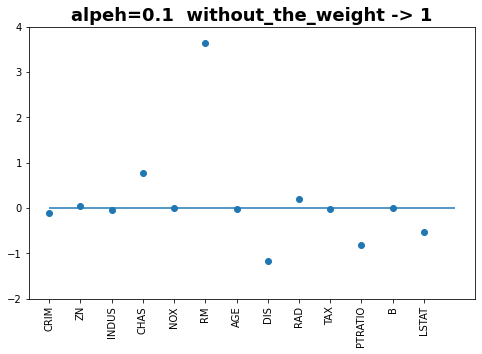

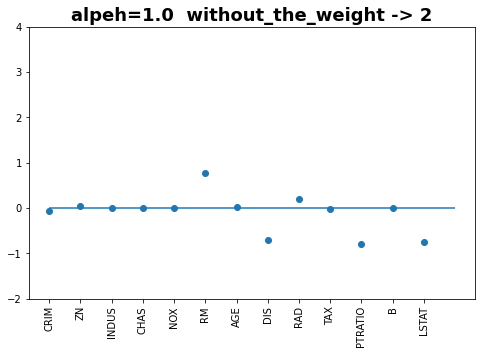

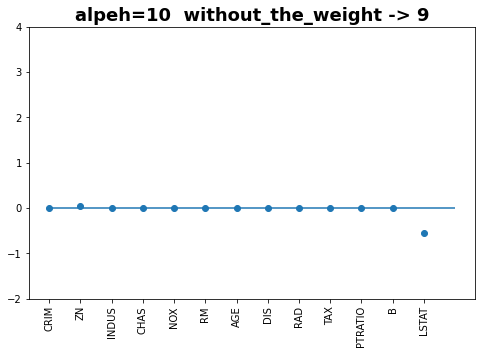

In [21]:
def feature_plt(data: np.ndarray, 
                feature_names: np.ndarray,
                coef_: np.ndarray,
                title: str):
    plt.figure(figsize=(8, 5))
    plt.title(title, fontweight="bold", size=18)
    plt.plot(coef_.T, 'o')
    plt.ylim(-2, 4)
    plt.xticks(range(data.shape[1]), feature_names, rotation=90)
    plt.hlines(0, 0, data.shape[1])

for i, coef in enumerate(coef_list):
    feature_plt(boston.data, boston.feature_names, coef, "alpeh=%s  without_the_weight -> %d" % (alpha_list[i], np.sum(coef == 0)))

alpha値が増加すると、重みが０となる特徴量が増える事が確認出来ます。

